# 12-752: Data-Driven Building Energy Management
## Fall 2016, Carnegie Mellon University

## Assignment \#2

We will begin by unpickling the dataset we had played around with in Lecture 4. But first, we will load most modules we will be using:

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import itertools
import pickle

%matplotlib inline

To unpickle just do this:

In [89]:
pickle_file = open('../../lectures/data/campusDemand.pkl','rb')
pickled_data = pickle.load(pickle_file)
pickle_file.close()

# Since we pickled them all together as a list, I'm going to assign each element of the list to the same variable
# we had been using before:
data = pickled_data[0]
pointNames = pickled_data[1]
data_by_day = pickled_data[2]
idx = pickled_data[3]


## -=-=-= Exploring hourly and weekly consumption patterns (no seasonality) =-=-=-

# Task \#1 (10%)

Create a new Pandas Data Frame that contains only two columns (Time and Value) and only the rows that belong to the University-wide meter (Electric kW Calculations Main Campus). In other words, get rid of the Point Name column and select only the rows for the campus meter.

In [90]:
# Your code goes here
newData = pd.DataFrame(
    np.array(data[['Time','Value']].ix[data['Point name'] == pointNames[5]]),
    columns=['Time','Value']
)
newData.head()

Time    Value
0  2013-11-10 00:00:30  8367.82
1  2013-11-10 00:01:30  8287.11
2  2013-11-10 00:02:30  8340.61
3  2013-11-10 00:03:30  8342.06
4  2013-11-10 00:04:30  8341.36

# Task \#2 (10%)

In one figure, plot one histogram showing the average hourly consumption on the entire dataset.
In a separate figure, plot 7 subplots with similar histograms but now showing the average hourly consumption for each day of the week (hence the 7 supplots).

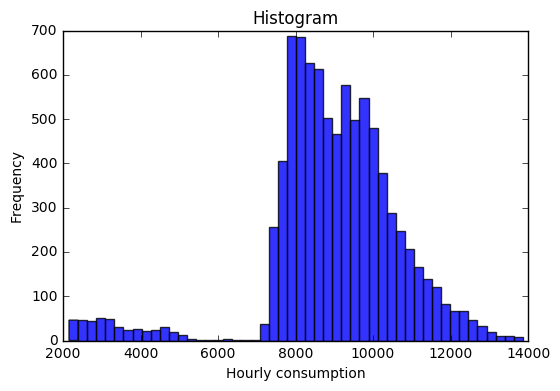

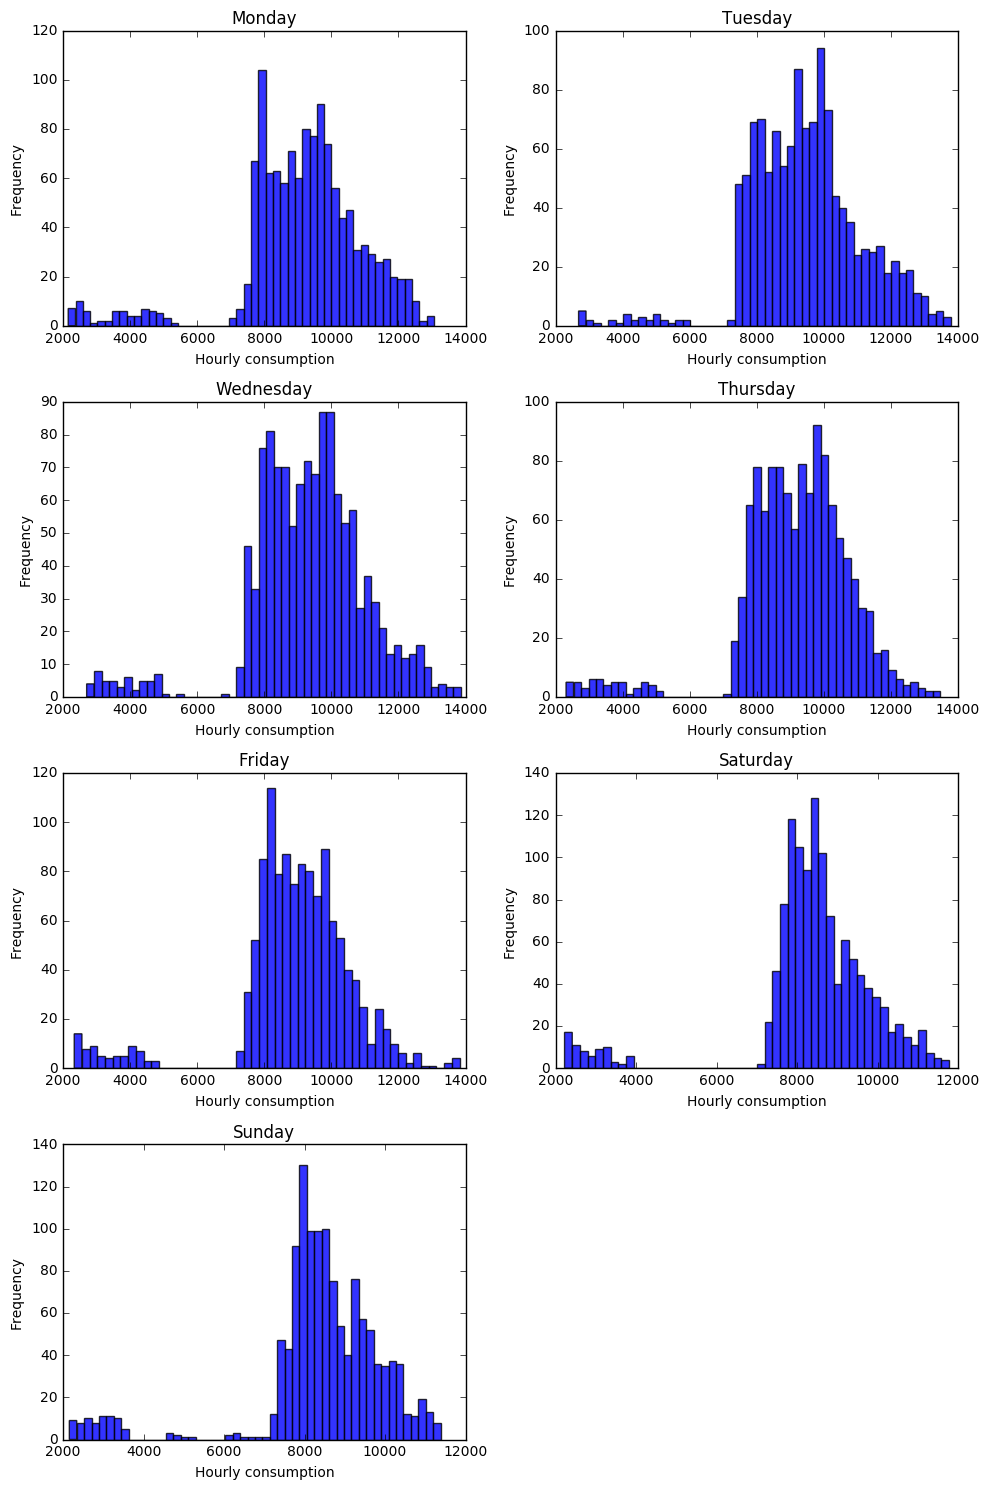

In [91]:
# Your code goes here
days = np.array([x.to_datetime().date() for x in newData['Time']])
hours = np.array([x.to_datetime().hour for x in newData['Time']])
tmp = pd.DataFrame(np.array([hours,days,newData['Value']]).T,columns=['Hour','Day','Value'])
hourly = tmp.groupby(['Hour','Day'])['Value'].apply(lambda x: np.mean(x))
p = plt.hist(hourly, bins=50, color='blue', alpha=0.8, align='mid')
plt.xlabel('Hourly consumption')
plt.ylabel('Frequency')
plt.title('Histogram')
# #--------------------------------------------------------------------
week_days = np.array([x.to_datetime().weekday() for x in newData['Time']])

Monday = pd.DataFrame(np.array(newData.ix[week_days == 0]),columns=('Time','Value'))
Tuesday = pd.DataFrame(np.array(newData.ix[week_days == 1]),columns=('Time','Value'))
Wednesday = pd.DataFrame(np.array(newData.ix[week_days == 2]),columns=('Time','Value'))
Thursday = pd.DataFrame(np.array(newData.ix[week_days == 3]),columns=('Time','Value'))
Friday = pd.DataFrame(np.array(newData.ix[week_days == 4]),columns=('Time','Value'))
Saturday = pd.DataFrame(np.array(newData.ix[week_days == 5]),columns=('Time','Value'))
Sunday = pd.DataFrame(np.array(newData.ix[week_days == 6]),columns=('Time','Value'))

wAll = [Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday]
Days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig = plt.figure(2,figsize=(10,15))
for j in range(7):
    plt.subplot(4,2,j+1)
    dayW = np.array([x.to_datetime().date() for x in wAll[j]['Time']])
    hourW = np.array([x.to_datetime().hour for x in wAll[j]['Time']])
    tmp = pd.DataFrame(np.array([dayW,hourW,wAll[j]['Value']]).T,columns=['Hour','Day','Value'])
    hourlyW = tmp.groupby(['Hour','Day'])['Value'].apply(lambda x: np.mean(x))
    pl = plt.hist(hourlyW, bins=50, color='blue', alpha=0.8, align='mid')
    plt.xlabel('Hourly consumption')
    plt.ylabel('Frequency')
    plt.title(Days[j])
fig.tight_layout()
plt.show()

# Task \#3 (10%)

In one figure, create a box plot of the average hourly electricity consumption for each hour of the day (i.e., your plot will show 24 *boxes*, one for each hour of the day, and each *box* will represent the distribution of the average hourly consumption in the dataset for that hour).

In another figure, create 7 subplots showing the same box plots as above, but now for each of the seven days of the week.

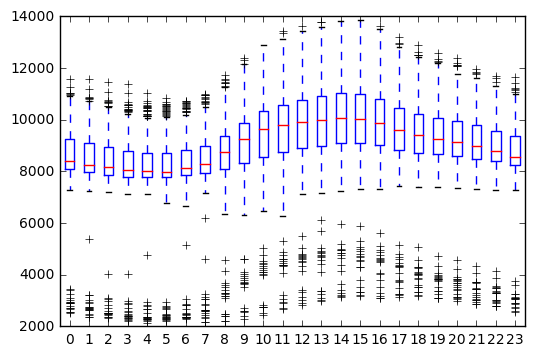

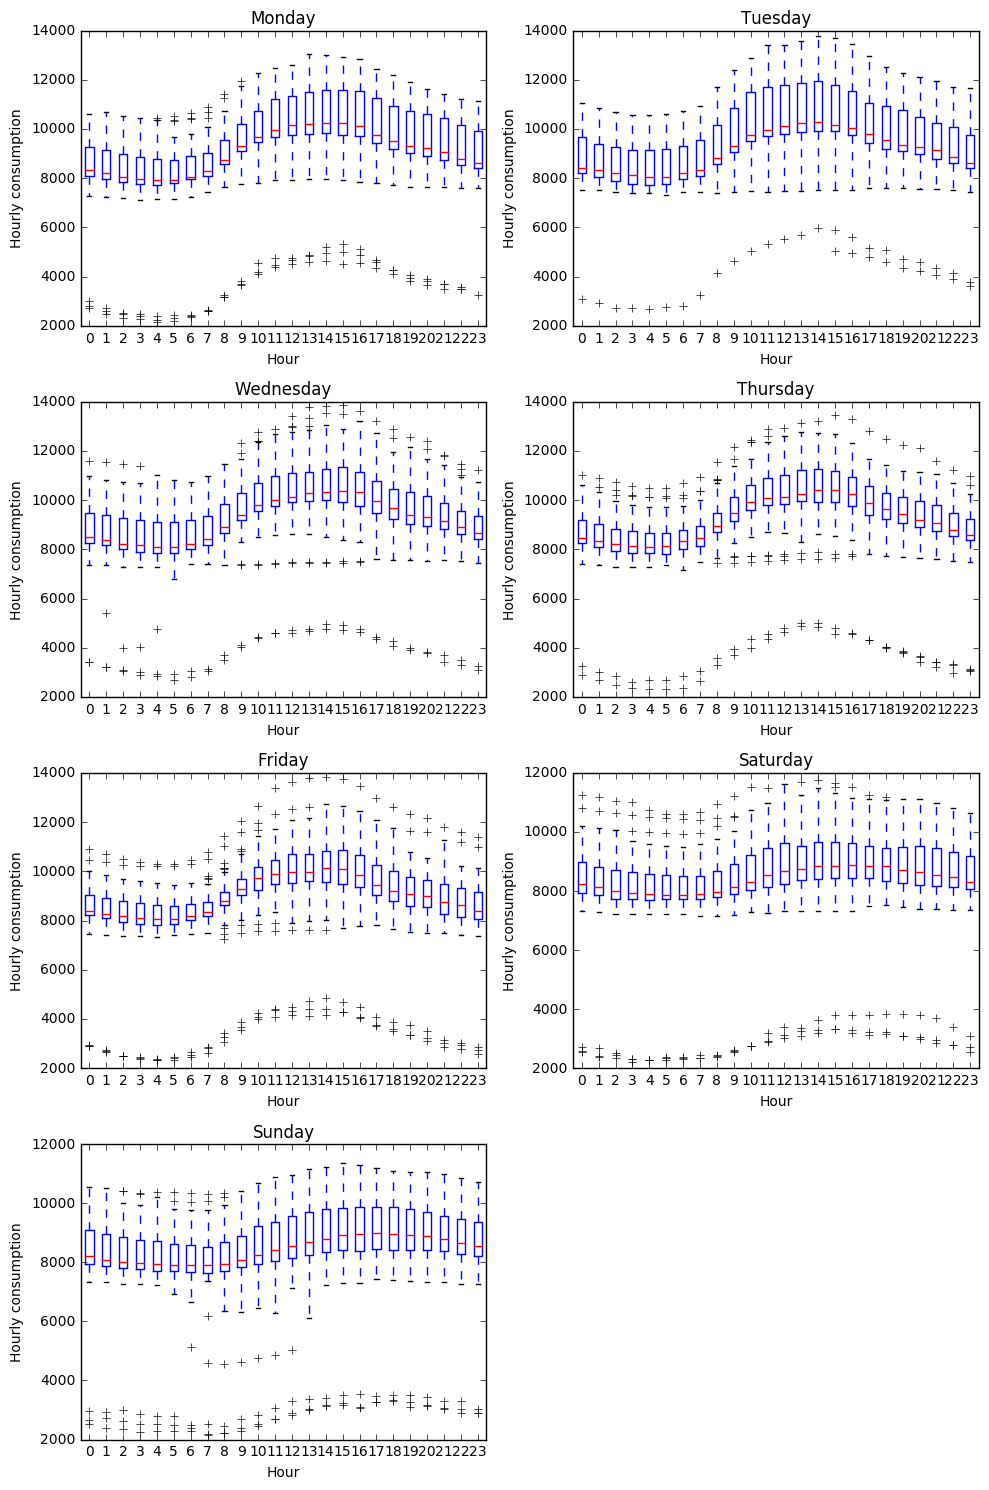

In [92]:
# Your code goes here
labels = np.arange(24)
hourlyUnstarked = np.array(hourly.unstack(level=1))
logicalHourly = []
# Delete Nan
for i in hourlyUnstarked:
    i = i[np.logical_not(np.isnan(i))]
    logicalHourly.append(i)
fig1 = plt.figure(1)
f = plt.boxplot(logicalHourly,labels=labels)
#--------------------------------------------------------------------
fig2 = plt.figure(2,figsize=(10,15))
for j in range(7):
    plt.subplot(4,2,j+1)
    hourW = np.array([x.to_datetime().hour for x in wAll[j]['Time']])
    dayW = np.array([x.to_datetime().date() for x in wAll[j]['Time']])
    tmp = pd.DataFrame(np.array([hourW,dayW,wAll[j]['Value']]).T,columns=['Hour','Day','Value'])
    hourlyW = tmp.groupby(['Hour','Day'])['Value'].apply(lambda x: np.mean(x))
    hourlyWUnstarked = np.array(hourlyW.unstack(level=1))
    consumption = []
# Delete Nan
    for i in hourlyWUnstarked:
        i = i[np.logical_not(np.isnan(i))]
        consumption.append(i)
    pl = plt.boxplot(consumption,labels=labels)
    plt.xlabel('Hour')
    plt.ylabel('Hourly consumption')
    plt.title(Days[j])
fig2.tight_layout()
plt.show()


## -=-=-= Exploring seasonal effects =-=-=-

# Task \#4 (10%)

Create a **stem plot** of the average daily electricity consumption for the whole dataset (i.e., the plot should have ~365 stems):

In [1]:
# Your code goes here
days = np.array([x.to_datetime().date() for x in newData['Time']])
# tmp = pd.DataFrame(np.array([days,newData['Value']]).T,columns=['Day','Value'])
tmp = pd.DataFrame(np.array([hours,days,newData['Value']]).T,columns=['Hour','Day','Value'])
# tmp = pd.DataFrame(
#     np.array(tmp[['Time','Value']].ix[data['Point name'] == pointNames[5]]),
#     columns=['Time','Value']
# )
tmp = pd.DataFrame(tmp.groupby(['Day','Hour'])['Value'].apply(lambda x: np.mean(x))).unstack()
c = np.sum(tmp, axis=1)
fig = plt.figure(figsize=(15,5))
plt.stem(c.index, c, '-.')
plt.xlabel('Day')
plt.ylabel('Daily electricity consumption')
plt.show()

NameError: name 'np' is not defined

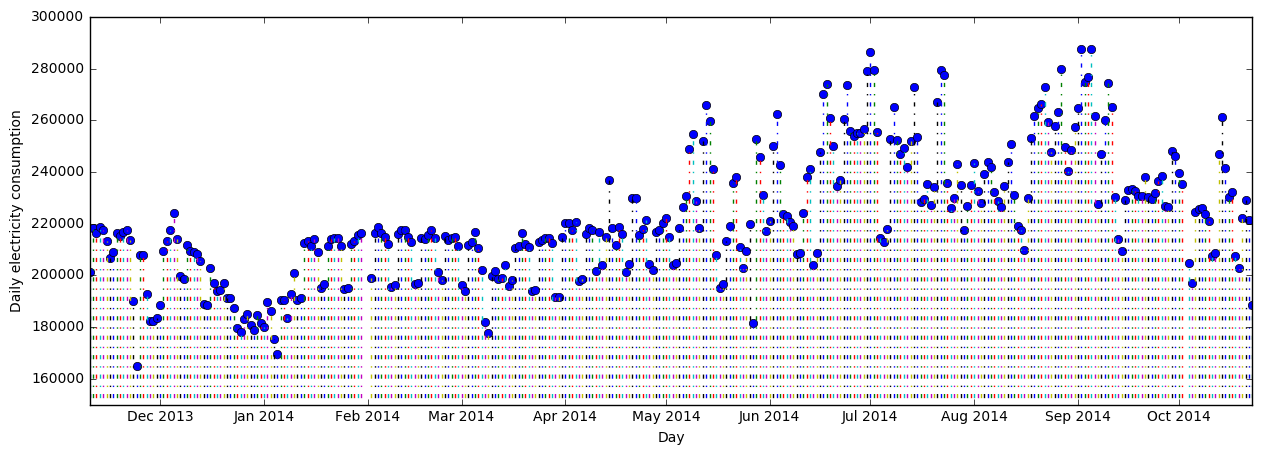

In [102]:
# Then I would like to delete ilogical values and plot again.
new_c = []
new_c.append(c.iloc[np.where(c > 150000)])
fig = plt.figure(figsize=(15,5))
plt.stem(new_c[0].index, new_c[0], '-.')
plt.xlabel('Day')
plt.ylabel('Daily electricity consumption')
plt.ylim([150000,300000])
plt.show()


# Task #5 (10%)

What are your findings so far? Please elaborate on how the above plots and analysis have informed you about the data. 


For the main campus, the majority of hourly consumptions are around 8000 to 10000 kWh, and the maximum consumption during weekdays is up to 14000 kWh, which is higher than that of weekends. The histogram of average hourly consumption looks like a bi-modal distribution, and I would like to use Lognormal for the first mode, and Normal or Weibull for the second mode to probabilistic fit the histogram.

In the task 3, those boxplots show us tendency of average hourly consumption. It can be seen that the minimum value is at around 6 am, the maximum value is at around 3 pm. They clearly show us that the daily consumption goes up at the beginning of the work hours (7 am), and reduces in the afternoon (after 4 pm). Furthermore, differences of consumption on weekends is smaller than that on weekdays, and the maximum hourly consumption on weekends is smaller than that on weekdays.

For seasonal effects, that figure in task 4 can clearly show us that the daily consumptions from May to October (summer) are higher than that from October to April (winter). That may be caused by using air conditions in summer. Also, the winter break (From later December to January) has smaller daily consumptions than other days. In addition, the daily consumptions have a periodic change in 7 days, which can be clearly seen from February to March.

The data from late October 2014 to early November 2014 are much smaller than they others. I cannot find a reason to interprete this phenomenon. They might be the error data. Thus, in following questions I will delete them.

# Task \#6 (10%)

Create a new DataFrame called ```loadCurves```, which contains 24 columns (one for each hour of the day) and each of those columns has a Series with as many rows as there are days in our dataset. Each column wil be composed of the average power consumed during that particular hour for each day of the year.

Note: You may benefit from knowing about the ```groupby``` and ```unstack``` methods for DataFrames.

In [95]:
# Your code goes here...
tmp = pd.DataFrame(np.array([hours,days,newData['Value']]).T,columns=['Hour','Day','Value'])
tmpMean = tmp.groupby(['Day','Hour'])['Value'].apply(lambda x: np.mean(x))
loadCurves = tmpMean.unstack(level=1)
loadCurves.head()

Hour                 0            1            2            3            4   \
Day                                                                           
2013-11-10  8261.731944  8131.553229  7985.570644  7912.394148  7857.923992   
2013-11-11  8197.355862  8054.626069  7868.638944  7771.354406  7811.224690   
2013-11-12  8266.870269  8145.089365  7946.754327  7840.498615  7842.833160   
2013-11-13  8433.263460  8275.495327  8090.760162  8002.365660  7949.081529   
2013-11-14  8345.743496  8170.467133  7990.828448  7943.760960  7852.243654   

Hour                 5            6            7            8            9   \
Day                                                                           
2013-11-10  7862.010058  7885.617094  7856.087542  7878.690183  8049.828625   
2013-11-11  7866.789740  8100.972517  8295.874919  8757.027031  9252.911467   
2013-11-12  7866.686498  8138.263460  8286.819533  8759.412804  9246.517062   
2013-11-13  7934.077544  8147.288067  8307.100948  8751.405846  9371.957619   
2013-11-14  7877.263787  8096.056890  8247.871173  8727.444219  9350.668415   

Hour           ...                 14            15            16  \
Day            ...                                                  
2013-11-10     ...        8771.265092   8840.671298   8841.125129   
2013-11-11     ...       10316.701271  10385.125150  10285.286000   
2013-11-12     ...       10059.032833  10031.943512   9961.895871   
2013-11-13     ...       10122.531558  10115.408479  10071.436379   
2013-11-14     ...       10374.962687  10359.396142  10169.311487   

Hour                 17           18           19           20           21  \
Day                                                                           
2013-11-10  8973.462544  8899.309123  8859.551002  8837.606698  8780.544769   
2013-11-11  9856.362792  9822.040604  9523.404717  9336.900454  9145.744081   
2013-11-12  9937.420021  9566.255748  9336.759300  9217.157573  9135.900333   
2013-11-13  9994.061208  9746.636367  9512.415563  9298.231329  9181.525150   
2013-11-14  9886.472496  9716.298571  9418.414556  9051.457006  8960.413940   

Hour                 22           23  
Day                                   
2013-11-10  8647.659969  8386.710027  
2013-11-11  8882.389113  8603.991221  
2013-11-12  8857.380377  8591.176633  
2013-11-13  8829.826569  8519.899406  
2013-11-14  8700.717290  8447.538688  

[5 rows x 24 columns]

# Task \#7 (10%)
Create a heatmap of the daily load curves for campus, similar to those shown in Paper \#1. In particular, this heatmap will be a 2D map with the horizontal axis showing the hours of the day (24 in total), and the vertical axis showing the day of the year (~365 total). Then each cell will be color-coded with the value corresponding to the average power consumed during this hour. 

Try different colormaps to see which one works best for you.

Note: you may need to normalize the data to see differences. 

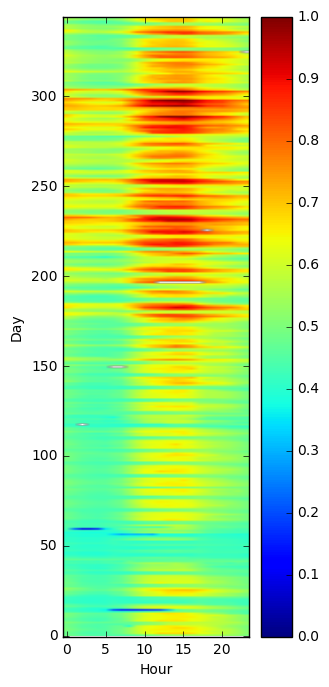

In [105]:
# Your code goes here...
# fig = plt.figure(1)
# fig.set_size_inches(10,2)
# heatmap = plt.imshow(loadCurves.T,origin='lower',aspect='auto')
# plt.colorbar(heatmap)
# plt.xlabel('Day')
# plt.ylabel('Hourly electricity consumption')
# plt.show()

# Delete illogical values as in task #4
newloadCurves = loadCurves.iloc[np.where(c > 150000)]

# normalize
normloadCurves = (newloadCurves-newloadCurves.min().min())/(newloadCurves.max().max()-newloadCurves.min().min())
fig = plt.figure(2)
fig.set_size_inches(3,8)
heatmap = plt.imshow(normloadCurves,origin='lower',aspect='auto')
plt.colorbar(heatmap)
plt.xlabel('Hour')
plt.ylabel('Day')
plt.show()


# Task \#8 (20%)

Let's see if we can find some patterns in these load curves. Using your favorite implementation and flavor of the k-means algorithm, play around with clustering the daily loadCurves to see if we can find 2 or 3 clusters that would best differentiate between weekdays and weekends. In other words, perform k-means (or k-medioids, or whatever) on the dataset with $k \in \{2, 3\}$ and the dataset being 365 samples of 24-dimensional vectors.

Note: you will only check the weekend vs. weekday labels **after** clustering (i.e., do not use this attribute for clustering, but rather only the 24 average hourly consumption values).

Iteration: 18


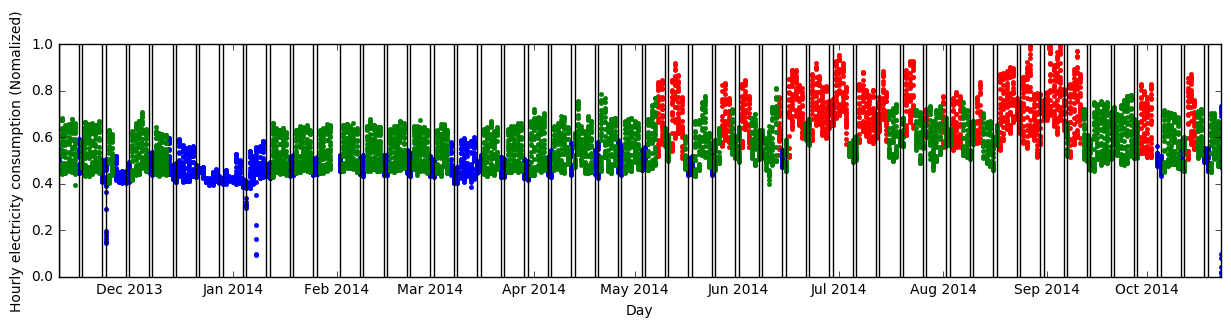

In [111]:
# After deleting ilogical data, I have tried several nomalization methods, such as standrad score, fea
# which may caused by the higer consumption in summer. Thus, I prefer to let k equals to 3.

# Develope Kmeans Clustering function by myself
#Clustering
def clustering(X, mu):
    clusters  = {}
    for j in range(len(X)):
        bestmukey = min([(i[0], np.linalg.norm(X.iloc[j]-mu[i[0]])) for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(X.iloc[j])
        except KeyError:
            clusters[bestmukey] = [X.iloc[j]]
    return clusters

# Re-evaluate
def findCenters(clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu

# Fill NAN with forward.
normloadCurves = normloadCurves.fillna(method='pad')

# 3 clusters
k = 3
oldmu = []
mu = []

iteration = 0
for i in range(k):
    oldmu.append(normloadCurves.iloc[round(len(normloadCurves)*np.random.random_sample())])
    mu.append(normloadCurves.iloc[round(len(normloadCurves)*np.random.random_sample())])
# Converged or not
while np.any([abs(mu[i]-oldmu[i]) > 0.001 for i in range(k)]):
    oldmu = mu
    clusters = clustering(normloadCurves, mu)
    mu = findCenters(clusters)
    iteration += 1

# iteration    
print('Iteration: ' + str(iteration))

# Check:
# Plot nomalized daily consumption to see the clusters.
color = ['.r','.b','.g','*y','^k','-c']
fig = plt.figure(figsize=(15,3))
for i in range(k):
#     print('Cluster' + str(i) + ' weekdays: ')
    clusterDays = [x.to_datetime() for x in pd.DataFrame(clusters[i]).index]
#     print(clusterWeekdays)
    plt.plot(clusterDays, clusters[i], color[i])
    plt.xlabel('Day')
    plt.ylabel('Hourly electricity consumption (Nomalized)')
    for i in clusterDays:
        if ((i.weekday() == 5) | (i.weekday() == 6)):
            plt.plot((i, i), (0, 1), 'k-', linewidth=1)
# Those vertical lines means weekends. This picture verifies my clustering.

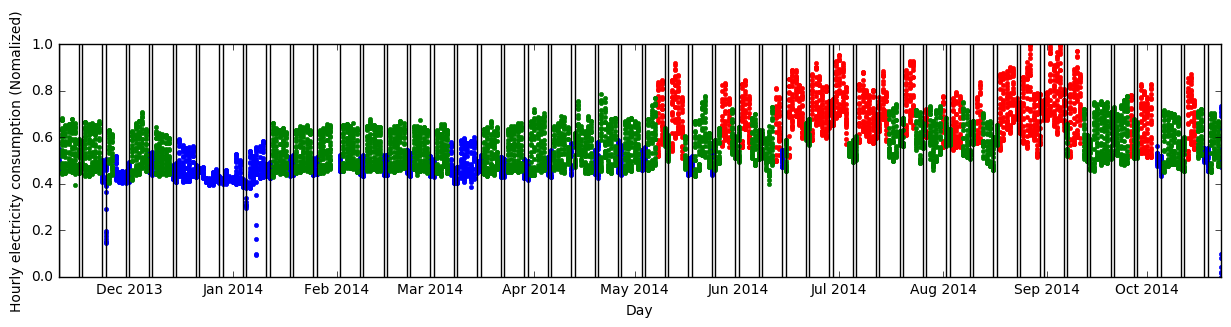

In [110]:
# Using sklearn
from sklearn.cluster import KMeans
# Fill NAN with forward.
k = 3
normloadCurves = normloadCurves.fillna(method='pad')
kmeans = KMeans(n_clusters=k).fit(normloadCurves)
skClusters = []
for i in range(k):
    skClusters.append(normloadCurves.iloc[np.where(kmeans.labels_ == i)])
# print('Kmeans Labels: ', kmeans.labels_)
# print('Cluster Centers: ', kmeans.cluster_centers_)
fig = plt.figure(figsize=(15,3))
for i in range(k):
    skClusterDays = [x.to_datetime() for x in pd.DataFrame(skClusters[i]).index]
    plt.plot(skClusterDays, skClusters[i], color[i])
    plt.xlabel('Day')
    plt.ylabel('Hourly electricity consumption (Nomalized)')
    for i in skClusterDays:
        if ((i.weekday() == 5) | (i.weekday() == 6)):
            plt.plot((i, i), (0, 1), 'k-', linewidth=1)

# My method works well as sklearn lib.

# Task \#9 (10%)

In separate plots (one for each cluster), plot the cluster centroids (in a dark, thick line) and the load curves that belong to the cluster (using thin grayish lines), just like the paper did. 

What did you learn from the experiment above?

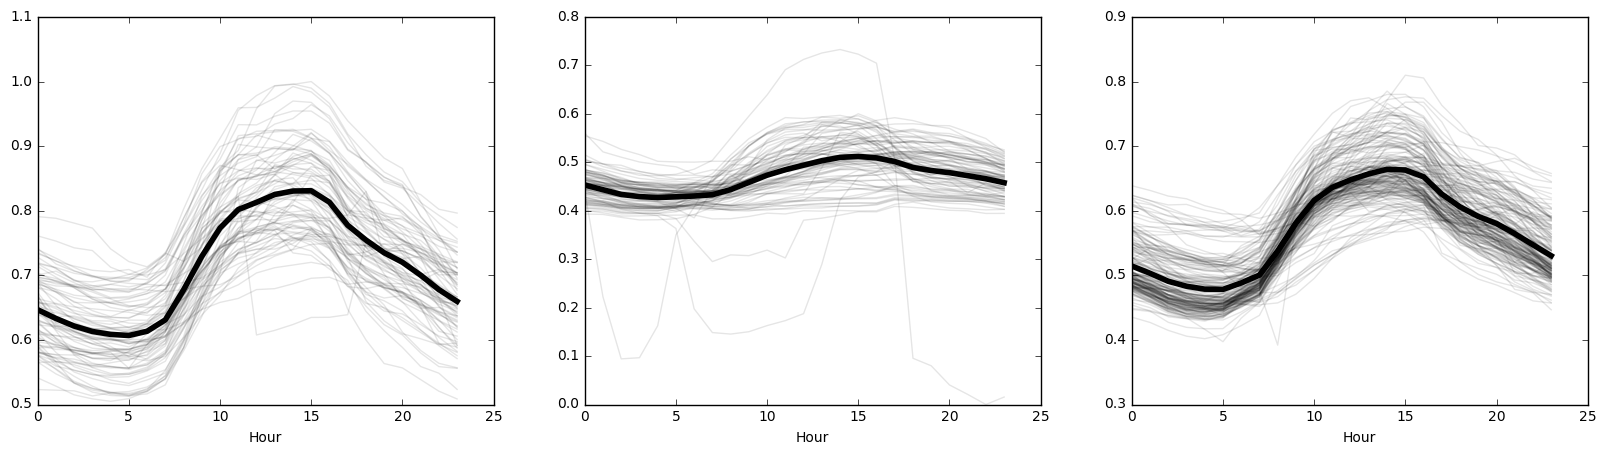

In [112]:
# Develope Clustering function by myself
plt.figure(1,figsize=(20,5))
for i in range(len(mu)):
    plt.subplot(1,len(mu),i+1)
    plt.plot(mu[i],linewidth=4, color='k')
    plt.xlabel('Hour')
    for j in range(len(clusters[i])):
        plt.plot(clusters[i][j], alpha=0.1, color='k')
plt.show()

According to those figures above, the middle figure (Blue cluster in the figure using my function in Task 8) contains the daily consumption of holidays, breaks and weekends (except summer). Two typical periods are the winter and spring break, which is from 20 Dec to 15 Jan, and from 13 Mar to 17 Mar.

The right figure above (Green cluster in the figure using my function in Task 8) contains the daily consumption of weekdays (except summer), and weekends in summer. And the left figure (Red cluster in the figure using my function in Task 8) contains the daily consumption of weekdays in summer. The reason for higher consumption is summer might be the usage of air condition.

In detail, the maximum hourly consumptions in weekends are smaller that in weekdays. But those three clusters have similar tendency.

In the future, I would like to find an approach to separate the dataset by different seasons or semesters and do clustering again to seek more appropriate interpretation.
